![](brain.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plot

# Test, biais et variance, régularisation - partie 1

## Mise en situation
J'ai implémenté un modèle, mais j'aimerais savoir s'il est efficace. Le coût est bien faible, c'est super !

Mais quand je l'utilise, c'est pas tout à fait ça :(

## Test d'un modèle
### Jeu de test
Jusque-là, nous avons entrainé des modèles à partir d'un jeu de données d'entrainement. Cela signifie qu'on a cherché le meilleur modèle par rapport à ce jeu de données exclusivement.

Si je veux mesurer la performance de mon modèle et que j'utilise ce même jeu de données, la réponse sera probablement très bonne : c'est la définition de l'entrainement !

Pour rappel : on dispose de certaines entrées / sorties d'une fonction inconnue, et on cherche à retrouver la fonction en lui faisant coller au plus près ces entrées / sorties, en espérant qu'une nouvelle entrée sera correctement traitée. Conclusion : toute entrée qui a servi à définir la fonction (par entrainement) ne sera pas inconnue au moment du test.

Il nous faut donc un jeu de données de test !

_Idéalement, quand on joue avec les hyper paramètres, il faut un jeu de données de dev et un autre de test, en plus du jeu d'entrainement, mais on verra ça plus tard._

En général, si on ne dispose pas d'un jeu de test dédié, on peut toujours découper le jeu de données en deux :
* 70% des données pour l'entrainement
* 30% des données pour le test

Si on dispose de millions de données, on peut revoir largement à la baisse le pourcentage de données de test, mais sur quelques milliers c'est un assez bon ratio.

Une fois le modèle entrainé, on va pouvoir le tester.

### Variance

Considérons le modèle suivant : on essaye d'entrainer une fonction linéaire toute bête (une somme de mesures, mais pas toutes)

In [2]:
np.random.seed(1)

#On génére un dataset de points dans [-10,10]^30, on cherche la somme des 25 premiers (on a des donnés qui servent à rien, mais ça arrivera souvent)
samples = 100
x = (np.random.rand(samples, 30) * 2 - 1)*10
y = np.sum(x[:,0:25], axis = 1).reshape(samples, 1)
y *= 0.9 + np.random.rand(samples, 1) * 0.2

# Train set
x_train = x[0:samples*7//10,:]
y_train = y[0:samples*7//10,:]
# Test set
x_test = x[samples*7//10:,:]
y_test = y[samples*7//10:,:]

def train_model_with_test_cost(x_train, y_train,
                               x_test, y_test):
    #Pre-processing
    x_train = np.concatenate([np.ones((x_train.shape[0], 1)), x_train], axis = 1)
    x_test  = np.concatenate([np.ones((x_test .shape[0], 1)), x_test ], axis = 1)

    #Equation normale - c'est plus rapide :)
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(x_train.T, x_train)), x_train.T), y_train)

    pred_train = np.dot(x_train, theta)
    pred_test  = np.dot(x_test,  theta)
    cost_train = np.average((pred_train - y_train)**2)
    cost_test  = np.average((pred_test  - y_test )**2)
    return theta, cost_train, cost_test

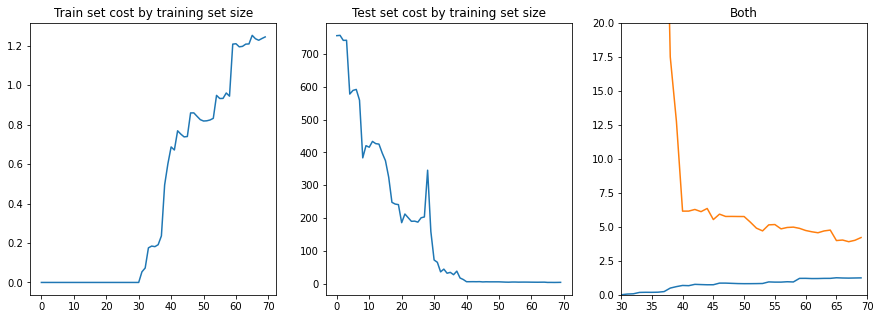

In [3]:
costs_train = []
costs_test  = []
sample_counts = range(0, x_train.shape[0], 1)
for sample_count in sample_counts:
    theta, cost_train, cost_test = train_model_with_test_cost(
        x_train[0:sample_count+1,:],
        y_train[0:sample_count+1,:],
        x_test, y_test)
    costs_train.append(cost_train)
    costs_test .append(cost_test )
    
fig = plot.figure(figsize=(15,5))
fig.add_subplot(131)
plot.plot(sample_counts, costs_train)
t = plot.title('Train set cost by training set size')
fig.add_subplot(132)
plot.plot(sample_counts, costs_test)
t = plot.title('Test set cost by training set size')
fig.add_subplot(133)
plot.ylim(0, 20)
plot.xlim(30, 70)
plot.plot(sample_counts, costs_train)
plot.plot(sample_counts, costs_test)
t = plot.title('Both')


*Bon ok, l'exemple est largement forcé...*
On constate plusieurs choses :
1. Le coût sur le jeu d'entrainement augmente avec la taille du jeu. Ca signifie que quand on essaye de coller à des données, plus il y en a et moins c'est évident
2. Le coût sur le jeu de test, lui, diminue. Ca signifie que si notre modèle colle à plus de données, il fera probablement mieux sur certaines qu'il n'a jamais vu
3. Les deux coûts sont sur la troisième figure. L'écart entre les deux est la _variance_ du modèle.

La variance est définie comme l'écart entre le résultat (coût) du modèle sur ses données d'entrainement et le résultat sur les données de test.

Un modèle qui colle bien lors de l'entrainement mais peu sur le test est un modèle **à forte variance** : on parle d'**overfit**.

### Le biais
Un autre modèle maintenant : 

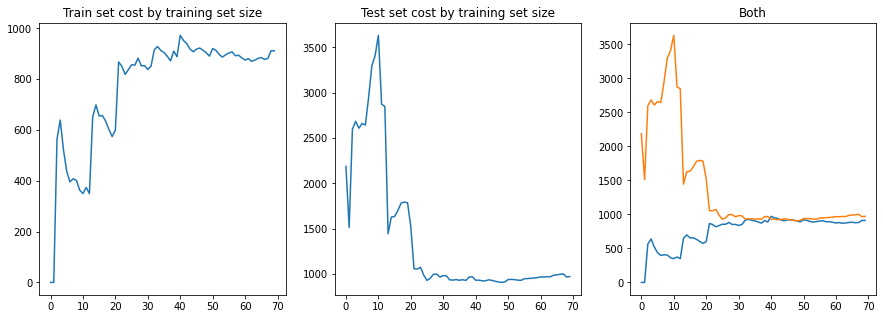

In [4]:
np.random.seed(1)

#On génére un dataset de points dans [-10,10] et on cherche leur carré
samples = 100
x = (np.random.rand(samples, 1) * 2 - 1)*10
y = x**2

# Train set
x_train = x[0:samples*7//10,:]
y_train = y[0:samples*7//10,:]
# Test set
x_test = x[samples*7//10:,:]
y_test = y[samples*7//10:,:]

costs_train = []
costs_test  = []
sample_counts = range(0, x_train.shape[0], 1)
for sample_count in sample_counts:
    theta, cost_train, cost_test = train_model_with_test_cost(
        x_train[0:sample_count+1,:],
        y_train[0:sample_count+1,:],
        x_test, y_test)
    costs_train.append(cost_train)
    costs_test .append(cost_test )
    
fig = plot.figure(figsize=(15,5))
fig.add_subplot(131)
plot.plot(sample_counts, costs_train)
t = plot.title('Train set cost by training set size')
fig.add_subplot(132)
plot.plot(sample_counts, costs_test)
t = plot.title('Test set cost by training set size')
fig.add_subplot(133)
plot.plot(sample_counts, costs_train)
plot.plot(sample_counts, costs_test)
t = plot.title('Both')

Quelques remarques :
* l'évolution des courbes reste correcte par rapport à l'analyse précédente ( la 1ere augmente, l'autre diminue)
* sur la 3ème, on constate deux nouveautés:
  * les deux jeux finissent par avoir une différence plutôt faible : pas d'overfit a priori (faible variance)
  * par contre, la hauteur de la courbe est assez élevée
  
Cette hauteur est le **biais** : il signifie que le modèle n'arrive pas à coller aux données. *Ca ne change rien au fait qu'on a toujours minimisé la fonction de coût, simplement on ne pouvait pas faire mieux.*

## Comment trouver le "bon" modèle

Tout d'abord, il faut analyser les résultats de son modèle :
* coût sur le jeu d'entrainement par rapport au nombre d'itérations
* coût sur le jeu d'entrainement par rapport à sa taille
* coût sur le jeu de test par rapport à la taille du jeu d'entrainement

En fonction des résultats, on peut adapter la suite

### Coût qui augmente /diverge avec les itérations
Encore une fois, mathématiquement parlant, le coût **ne peut pas** augmenter si $\alpha$ n'est pas trop grand.

La solution est donc toute trouvée : essayer de baisser $\alpha$ dans un premier temps.

### Coût élevé sur un gros jeu d'entrainement
Autrement dit : fort biais.

Dans ces cas là, il est **inutile**:
* de collecter plus de données d'exemple: le modèle n'arrive déjà pas à s'en sortir avec celles qu'il a !
* d'entrainer le modèle plus longtemps : il n'est pas assez complexe par rapport au problème

On peut par contre :
* ajouter des mesures à chaque exemple (des données qui pourraient être exploitées pour combler le biais)
* essayer un autre modèle plus complexe (quadratique, cubique, etc...)

### Grande différence entre entrainement et test
Autrement dit : forte variance

Dans ces cas là, il est **inutile**:
* d'ajouter des mesures aux exemples : le modèle fait déjà "trop" bien avec celles qu'il a, il ne fera pas "moins" bien avec des informations en plus
* d'entrainer le modèle plus longtemps : il sera simplement encore plus "mieux" sur le jeu d'entrainement...

On peut par contre :
* entrainer le modèle sur un jeu de données avec plus d'exemples : s'il a réussi à s'en sortir avec trop de liberté, coller à plus d'exemples lui en retirera un peu
* essayer un modèle plus simple (retirer des mesures que le modèle exploiterait à tort par exemple)

### Autre solution : la régularisation
Une autre option est de "régulariser" son modèle. On verra demain ce que ça signifie en théorie et en pratique